In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('comlit_data/train.csv')
train

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845
...,...,...,...,...,...,...
2829,25ca8f498,https://sites.ehe.osu.edu/beyondpenguins/files...,CC BY-SA 3.0,When you think of dinosaurs and where they liv...,1.711390,0.646900
2830,2c26db523,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,So what is a solid? Solids are usually hard be...,0.189476,0.535648
2831,cd19e2350,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,The second state of matter we will discuss is ...,0.255209,0.483866
2832,15e2e9e7a,https://en.wikibooks.org/wiki/Geometry_for_Ele...,CC BY-SA 3.0,Solids are shapes that you can actually touch....,-0.215279,0.514128


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2834 non-null   object 
 1   url_legal       830 non-null    object 
 2   license         830 non-null    object 
 3   excerpt         2834 non-null   object 
 4   target          2834 non-null   float64
 5   standard_error  2834 non-null   float64
dtypes: float64(2), object(4)
memory usage: 133.0+ KB


In [4]:
# descriptive statistics of num columns

train[['target', 'standard_error']].describe()

,target,standard_error
count,2834.000000,2834.000000
mean,-0.959319,0.491435
std,1.033579,0.034818
min,-3.676268,0.000000
25%,-1.690320,0.468543
50%,-0.912190,0.484721
75%,-0.202540,0.506268
max,1.711390,0.649671


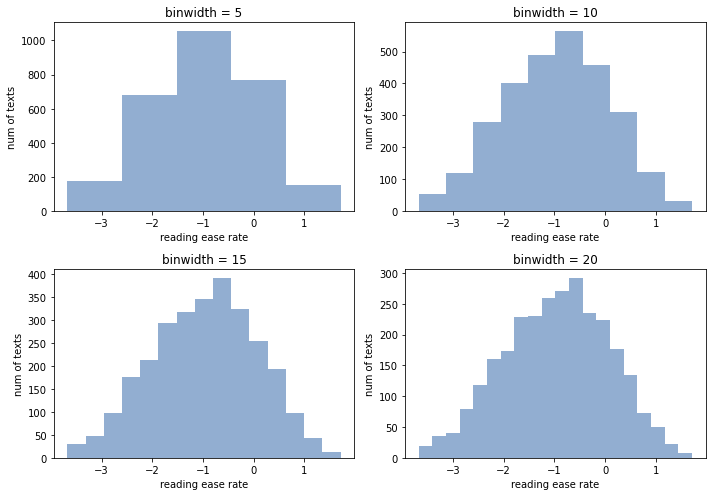

In [37]:
# histogram of reading ease rate with different bins

plt.figure(figsize=(10, 7)) 
for i, binwidth in enumerate([5, 10, 15, 20]):
    
    ax = plt.subplot(2, 2, i + 1)
    
    ax.hist(train['target'], bins = binwidth, color = '#92aed1')

    ax.set_title('binwidth = %d' % binwidth)
    ax.set_xlabel('reading ease rate')
    ax.set_ylabel('num of texts')
    plt.tight_layout()

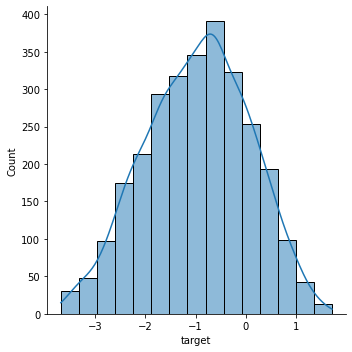

In [68]:
# density plot and histogram of reading ease rate

sns.displot(data = train, x = 'target', kde=True, bins='doane');

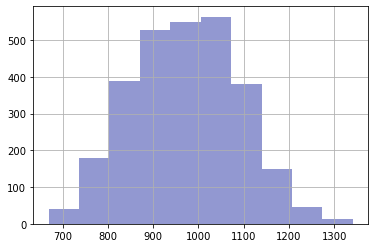

In [7]:
# histogram of number of characters

train['excerpt'].str.len().hist(color = '#9298d1');

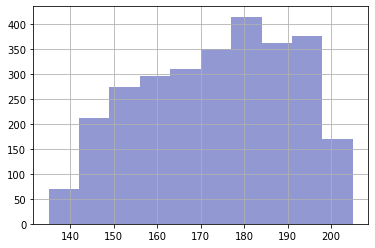

In [8]:
# histogram of number of words

train['excerpt'].str.split().map(lambda x: len(x)).hist(color = '#9298d1');

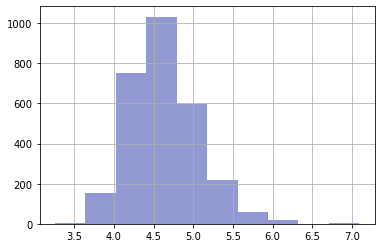

In [9]:
# average word length in text

train['excerpt'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(color = '#9298d1');

<AxesSubplot:>

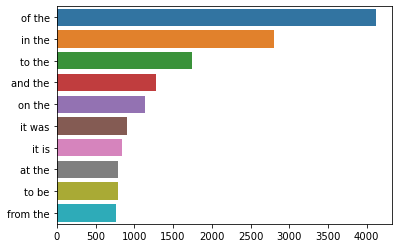

In [10]:
# top 10 ngram

def get_top_ngram(corpus, n = None):
    vec = CountVectorizer(ngram_range = (n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_n_bigrams = get_top_ngram(train['excerpt'], 2)[:10]
x,y = map(list,zip(*top_n_bigrams))
sns.barplot(x = y,y = x)

<AxesSubplot:>

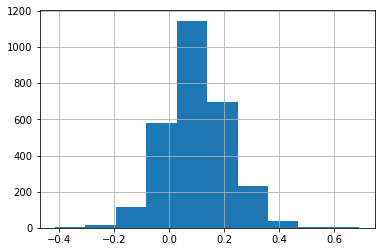

In [11]:
# polarity of texts (x < 0 - neg, x == 0 - neu, x > 0 - pos)

from textblob import TextBlob

def polarity(text):
    return TextBlob(text).sentiment.polarity
train['excerpt'].apply(lambda x : polarity(x)).hist()

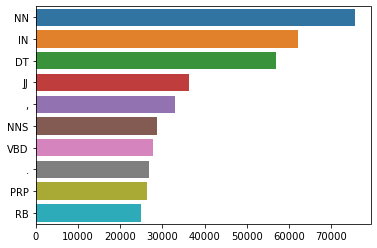

In [12]:
# parts of speech frequncy

from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

def pos(text):
    pos = nltk.pos_tag(word_tokenize(text))
    pos = list(map(list,zip(*pos)))[1]
    return pos

tags = train['excerpt'].apply(lambda x : pos(x))
tags = [x for l in tags for x in l]
counter = Counter(tags)
x,y = list(map(list,zip(*counter.most_common(10))))
sns.barplot(x = y,y = x);

In [62]:
# samples_per_bin, bins = np.histogram(train['target'], bins='doane')

# min_bin_size = samples_per_bin.min()

# n_bins = len(samples_per_bin)